# Decision Tree Worksheet


In [0]:
# import packages
!pip install graphviz 
!apt-get install graphviz

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
!pip install -q graphviz
import graphviz
import matplotlib.pyplot as plt

#### Load pima indians diabetes dataset below

In [0]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# your code here
data = pd.read_csv(url, names=names)

In [3]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### create training and testing dataset with sklearn function: train_test_split

In [0]:
# your code here
X = data.iloc[:,:-1].as_matrix()
Y = data.iloc[:,-1].as_matrix()
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = None)

#### Create a model with sklearn's DecisionTreeClassifier and predict values on your test set

In [0]:
# your code here
decision_model = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                               max_depth=5, min_samples_leaf=5)  # minimum sample leafs is the minimum sample amount the leaf can have
decision_model.fit(X_train, y_train)
y_pred = decision_model.predict(X_test)

#### Print the accuracy on the test data, play with the parameters and try to improve the accuracy
hint: there is an sklearn to calculate accuracy

In [19]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  71.86147186147186


#### Use graphviz to view the decision tree graph
##### hint: want to look at a code example, see the Classification Evaluation notebook on github

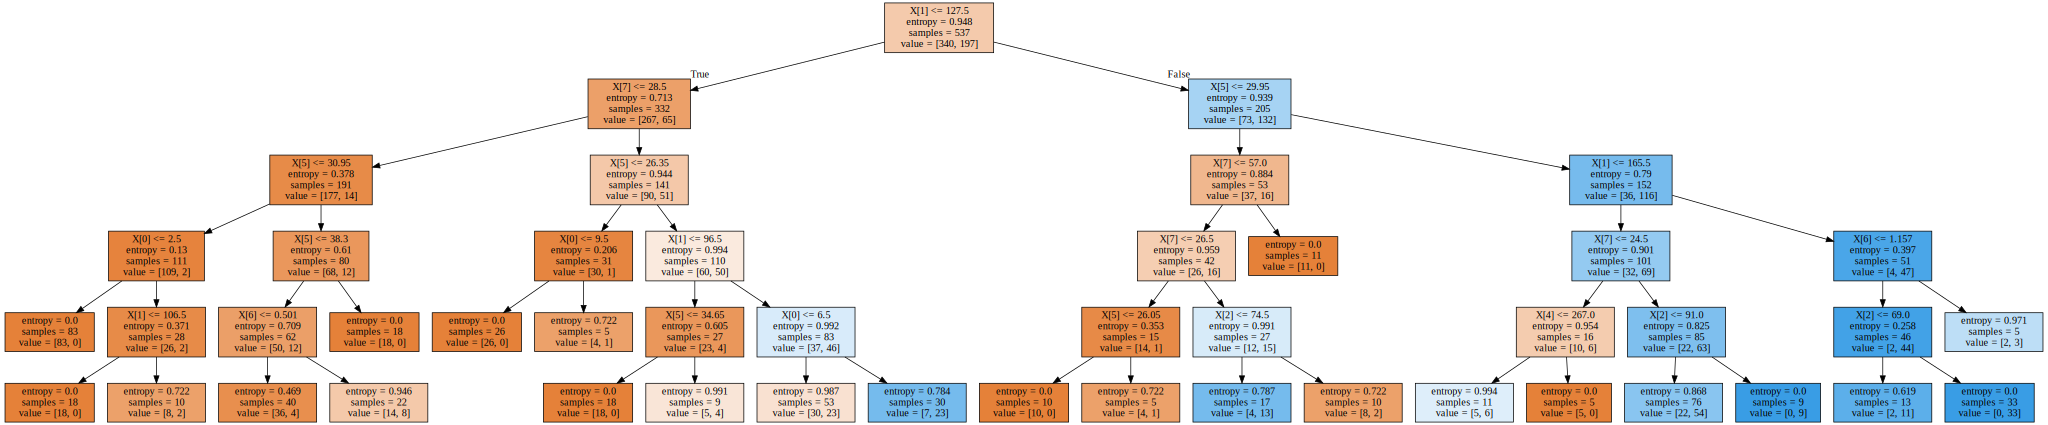

In [20]:
dot_data = tree.export_graphviz(decision_model, out_file=None, filled=True)

graph = graphviz.Source(dot_data)  
graph

#### Copy and paste the above graph into webgraphviz.com to see a picture representation of the graph<br>
#### Use the graph to answer the questions below

Question 1: If you add up the samples from the leaf nodes, how many samples are there?

Your answer here <br>
The number of samples in X or y train

Question 2: What do you think X[n] represents in the nodes from the graph? <br>
If you are stuck talk to people around you or ask the teachers

Your answer here <br>
The feature number

Question 3: What is the root feature? Does it make sense as the root feature?

Your answer here <br>
For me it is plas (from pandas this is the one with the highest correlation)

#### If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

Your answer here <br>
It should overfit, so the test accruacy should go down and the training accuracy should increase

#### Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and test data <br>
you only need to predict part of the training data

In [11]:
# your code here
decision_model = DecisionTreeClassifier(criterion = "gini", random_state = None,
                               max_depth=500, min_samples_leaf=1)  # minimum sample leafs is the minimum sample amount the leaf can have
decision_model.fit(X_train, y_train)

y_pred = decision_model.predict(X_train)
print("Train accuracy is ", accuracy_score(y_train[:len(y_pred)],y_pred)*100)

y_pred = decision_model.predict(X_test)
print("Test accuracy is ", accuracy_score(y_test,y_pred)*100)

Train accuracy is  100.0
Test accuracy is  69.26406926406926


# Random Forest

#### Create a model with sklearn's RandomForestClassifier and predict values on your test set

In [12]:
# your code here 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
preds = random_forest.predict(X_test)

#### Print the accuracy on the test data, play with the parameters and try to improve the accuracy<br>
how did the accuracy compare to the decision tree's accuracy?<br>

In [13]:
# your code here
print("Test accuracy is ", accuracy_score(y_test,preds)*100)

Test accuracy is  76.19047619047619


#### Print the 3 most important features<br>
hint: sklearn has an attribute to help you find these 

In [14]:
# your code here
sorted_features = random_forest.feature_importances_.argsort()
print("feature 1 ", names[sorted_features[-1]])
print("feature 2 ", names[sorted_features[-2]])
print("feature 3 ", names[sorted_features[-3]])

feature 1  plas
feature 2  mass
feature 3  age


#### Find the accuracy for random forests with 1 to 100 trees, counting by 5. Plot these accuracies

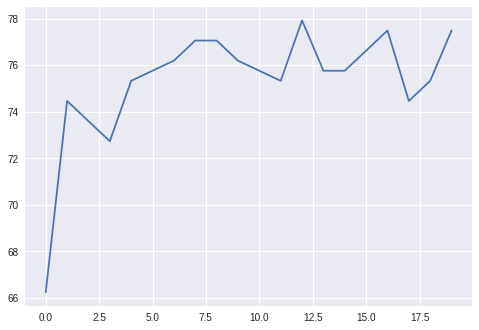

In [16]:
#your code here
accuracies = []
for i in range(1,100,5):
  random_forest = RandomForestClassifier(n_estimators=i)
  random_forest.fit(X_train, y_train)
  preds = random_forest.predict(X_test)
  temp_acc = accuracy_score(y_test,preds)*100
  accuracies.append(temp_acc)
plt.plot(accuracies)

#### Plot the roc_curve using predict_proba a function for our random forest model, and metrics. roc_curve <br>
It might help to google these functions and look at sklearn's documentation

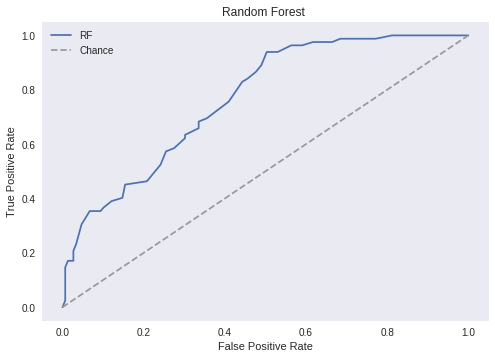

In [17]:
probs = random_forest.predict_proba(X_test)
scores = []
for prob in probs:
  prob_min = prob.argmin()  # take min b/c its relative to 0
  prob_score = prob[prob_min]
  
  scores.append(prob_score)
 
fpr, tpr, thresh = metrics.roc_curve(y_test,scores)

# plot results
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ')
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Chance')
plt.grid()
plt.legend()
plt.show()


#### To view the trees in the random_forest you can loop through your model's '.estimators_" attribute <br>
If you have time look at pictures of the trees

In [18]:
for tr in random_forest.estimators_: 
  break

#####  one thing to notice is the trees probably have greater depth (and smaller samples at the leafs) because they want to overfit and then average

In [21]:

dot_data = tree.export_graphviz(tr, out_file=None)  
graph = graphviz.Source(dot_data)
graph

NameError: ignored